## Here, I am going to study more detaled the data distribution in my datasets , and influence of scaling and transformation 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import kstest, kurtosis, skew


%matplotlib inline


In [2]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")
df_drop=pd.read_csv("auto_data_cleaned_drop__15_10_2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238302 entries, 0 to 238301
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     238302 non-null  object 
 1   model                     238302 non-null  object 
 2   color                     238221 non-null  object 
 3   year                      238302 non-null  float64
 4   price_in_euro             238302 non-null  float64
 5   power_ps                  238302 non-null  float64
 6   transmission_type         238302 non-null  object 
 7   fuel_type                 238302 non-null  object 
 8   fuel_consumption_l_100km  238302 non-null  float64
 9   mileage_in_km             238302 non-null  float64
 10  offer_description         238302 non-null  object 
 11  age                       238302 non-null  float64
dtypes: float64(6), object(6)
memory usage: 21.8+ MB


In [3]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213668 entries, 0 to 213667
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     213668 non-null  object 
 1   model                     213668 non-null  object 
 2   color                     213596 non-null  object 
 3   year                      213668 non-null  float64
 4   price_in_euro             213668 non-null  float64
 5   power_ps                  213668 non-null  float64
 6   transmission_type         213668 non-null  object 
 7   fuel_type                 213668 non-null  object 
 8   fuel_consumption_l_100km  213668 non-null  float64
 9   mileage_in_km             213668 non-null  float64
 10  offer_description         213668 non-null  object 
 11  age                       213668 non-null  float64
dtypes: float64(6), object(6)
memory usage: 19.6+ MB


### Visualizations:
Histogram: A great starting point for visualizing the overall shape of the data. It gives you a rough idea of whether the data might be normally distributed by showing the frequency of different values in bins.

Boxplot: This shows the spread of the data and can help identify outliers. For normal data, the boxplot should look symmetric with a median line close to the center of the box.

QQ-Plot (Quantile-Quantile Plot): This is very effective for checking normality. In a QQ-plot, if the data is normally distributed, the points should lie on or close to a straight line. It compares the quantiles of your data with the quantiles of a normal distribution.

### Statistical Tests:
Shapiro-Wilk Test: This test is commonly used for small to moderately sized datasets. It tests the null hypothesis that the data is normally distributed. A low p-value (typically < 0.05) indicates that the data is not normally distributed.

Kolmogorov-Smirnov Test: This test compares the sample distribution with a reference probability distribution (in this case, the normal distribution). It’s suitable for larger datasets. A p-value less than 0.05 also indicates non-normality.

Anderson-Darling Test: This is a variation of the Kolmogorov-Smirnov test that is often preferred for normality checks. It is more sensitive to deviations in the tails of the distribution.

### Histograms of values distribution:

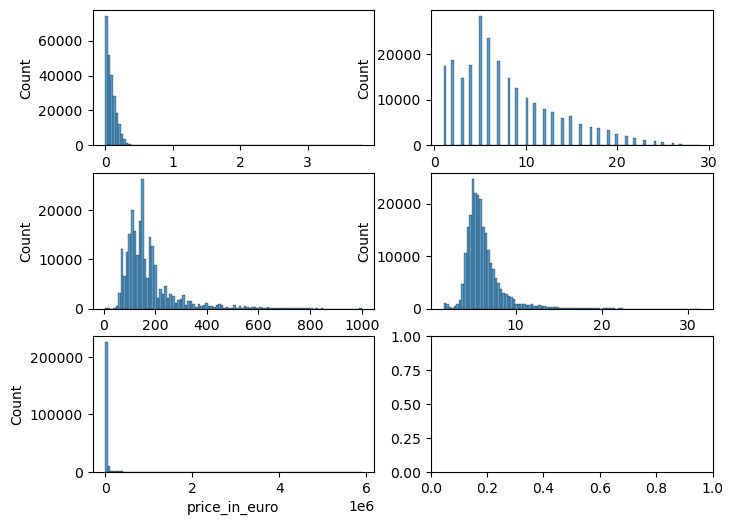

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

sns.histplot(df['mileage_in_km'], bins=100, edgecolor='k',ax=axes[0, 0])


sns.histplot(df['age'], bins=100, edgecolor='k',ax=axes[0, 1])


sns.histplot(df['power_ps'], bins=100, edgecolor='k', ax=axes[1, 0])

sns.histplot(df['fuel_consumption_l_100km'], bins=100, edgecolor='k', ax=axes[1, 1])

sns.histplot(df['price_in_euro'], bins=100, edgecolor='k', ax=axes[2, 0])

plt.show();

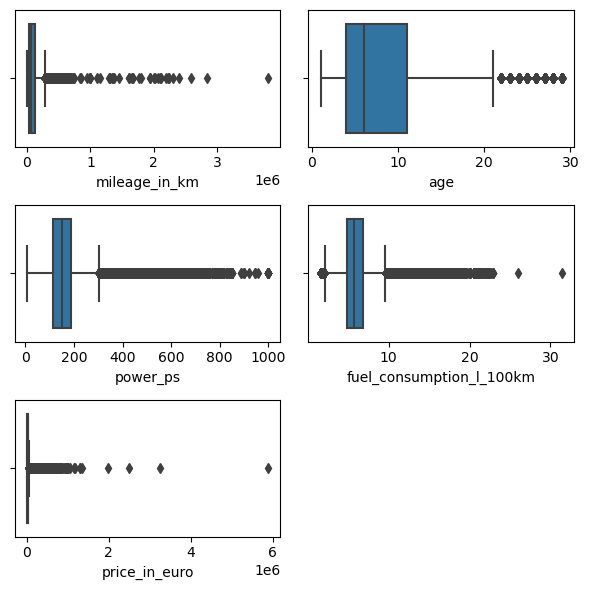

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))

sns.boxplot(x=df['mileage_in_km'],ax=axes[0, 0])


sns.boxplot(x=df['age'],ax=axes[0, 1])


sns.boxplot(x=df['power_ps'], ax=axes[1, 0])


sns.boxplot(x=df['fuel_consumption_l_100km'], ax=axes[1, 1])

sns.boxplot(x=df['price_in_euro'], ax=axes[2, 0])
# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show();



### All these variables have heavy tails of outliers, to the upper side

## Skewness and curtosis:

In [6]:
skew_price = skew(df['price_in_euro'].dropna())
skew_mileage= skew(df['mileage_in_km'].dropna())
skew_fuel = skew(df['fuel_consumption_l_100km'].dropna())
skew_age= skew(df['age'].dropna())
skew_ps= skew(df['power_ps'].dropna())


print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')



kurt_price = kurtosis(df['price_in_euro'].dropna())
kurt_mileage = kurtosis(df['mileage_in_km'].dropna())
kurt_fuel = kurtosis(df['fuel_consumption_l_100km'].dropna())
kurt_age = kurtosis(df['age'].dropna())
kurt_ps = kurtosis(df['power_ps'].dropna())



print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')



Skewness - Price: 29.61604136374282
Skewness - Mileage: 3.1049285555279185
Skewness - Fuel: 2.0435293551265676
Skewness - Age: 1.0213812084815
Skewness - PS: 2.387538278513381
Kurtosis - Price: 3325.1657888845193
Kurtosis - Mileage: 62.97003841237432
Kurtosis - Fuel: 7.52921907880253
Kurtosis - Age: 0.6370554239778925
Kurtosis - PS: 7.648055807357606


### Mileage and Price have the outstanding skewness and curtosis, I think, the outliers for them will be removed for machine learning. The age is OK. power PS and Fuel consumption are  high, but maybe acceptable. Let see, whether transforamtions will help here.

In [7]:
def count_outliers(df, column):
    """
    This function calculates the number of outliers in a specified column of a DataFrame 
    based on the Interquartile Range (IQR) method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the column to check for outliers.

    Returns:
    int: The number of outliers in the specified column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Calculate the number of outliers
    num_outliers = outliers[column].count()
    
    return num_outliers


outliers_price = count_outliers(df, 'price_in_euro')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df, 'mileage_in_km')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df, 'fuel_consumption_l_100km')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df, 'power_ps')
print('The number of outliers for power is:', outliers_power)



The number of outliers for price is: 14599
The number of outliers for mileage is: 4878
The number of outliers for fuel consum is: 14591
The number of outliers for power is: 20170


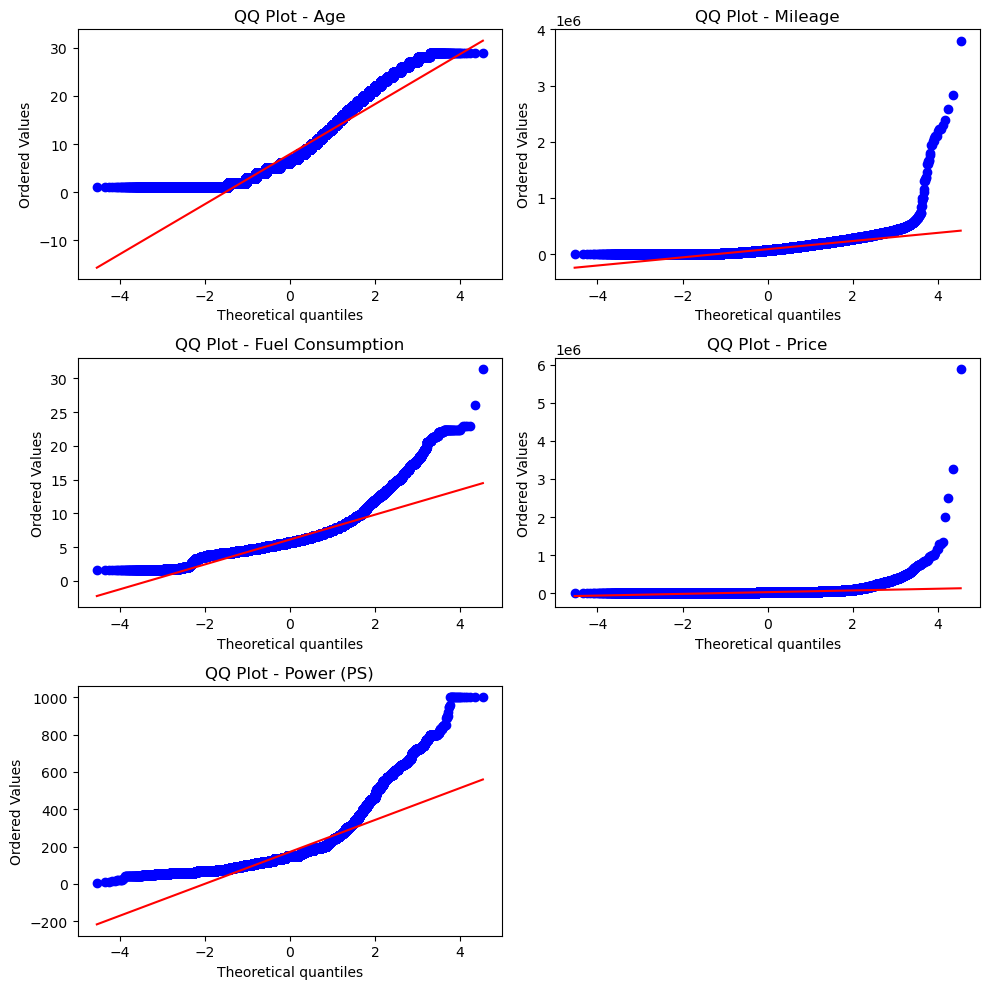

In [8]:
# Create a 3x2 grid (to accommodate 5 QQ plots)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# First QQ plot (Age)
stats.probplot(df['age'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot - Age')

# Second QQ plot (Mileage)
stats.probplot(df['mileage_in_km'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot - Mileage')

# Third QQ plot (Fuel consumption)
stats.probplot(df['fuel_consumption_l_100km'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot - Fuel Consumption')

# Fourth QQ plot (Price)
stats.probplot(df['price_in_euro'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Price')

# Fifth QQ plot (Power in PS)
stats.probplot(df['power_ps'], dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('QQ Plot - Power (PS)')

# Remove the unused subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

# Adjust the layout to make it more readable
plt.tight_layout()



# Show the plot
plt.show()

In [9]:
#Kolmogorov-Smirnov test
from scipy.stats import kstest

stat, p = kstest(df['mileage_in_km'], 'norm')
print(f'Statistic_mileage: {stat}, p-value: {p}')

stat, p = kstest(df['power_ps'], 'norm')
print(f'Statistic_power: {stat}, p-value: {p}')

stat, p = kstest(df['age'], 'norm')
print(f'Statistic_age: {stat}, p-value: {p}')

stat, p = kstest(df['fuel_consumption_l_100km'], 'norm')
print(f'Statistic_fuel_consumption: {stat}, p-value: {p}')


stat, p = kstest(df['price_in_euro'], 'norm')
print(f'Statistic_Price: {stat}, p-value: {p}')
print('The results show that values distribution is not normal')

Statistic_mileage: 0.9970224869272128, p-value: 0.0
Statistic_power: 0.9999999999987201, p-value: 0.0
Statistic_age: 0.9043088100665752, p-value: 0.0
Statistic_fuel_consumption: 0.9867273767404316, p-value: 0.0
Statistic_Price: 1.0, p-value: 0.0
The results show that values distribution is not normal


## Actually, what about Model and Brand? They are categorical, but for machine learning I will use encoded values. I think, I should test them as well.

In [10]:
import category_encoders as ce

# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


In [11]:
outliers_model = count_outliers(df, 'Modell_encoded')
print('The number of outliers for model is:', outliers_model)

outliers_brand = count_outliers(df, 'Brand_encoded')
print('The number of outliers for brand is:', outliers_brand)


The number of outliers for model is: 17808
The number of outliers for brand is: 11360


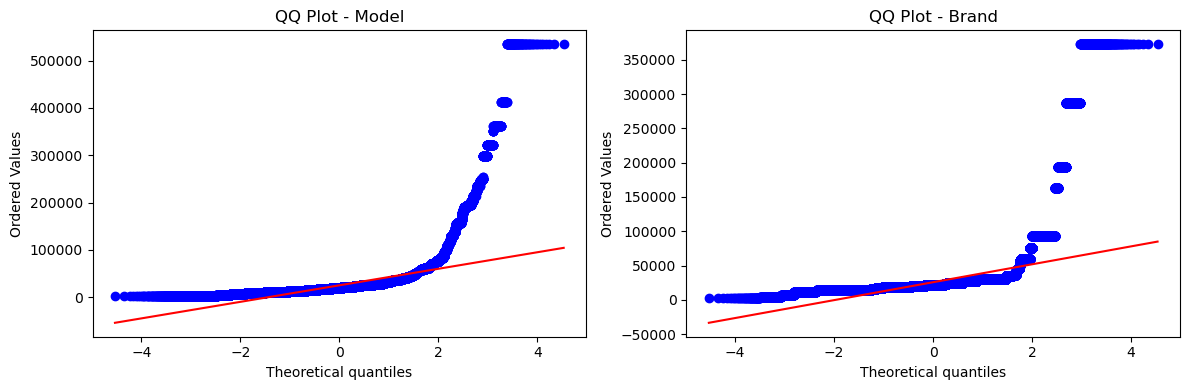

In [12]:
# Create a 1x2 grid (to accommodate 2 QQ plots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First QQ plot (Model)
stats.probplot(df['Modell_encoded'], dist="norm", plot=axes[0])
axes[0].set_title('QQ Plot - Model')

# Second QQ plot (Brand)
stats.probplot(df['Brand_encoded'], dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot - Brand')

# Adjust the layout to make it more readable
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
skew_Model = skew(df['Modell_encoded'].dropna())
skew_Brand= skew(df['Brand_encoded'].dropna())
print(f'Skewness - Model: {skew_Model}')
print(f'Skewness - Brand: {skew_Brand}')
kurt_Model= kurtosis(df['Modell_encoded'].dropna())
kurt_Brand = kurtosis(df['Brand_encoded'].dropna())
print(f'Kurtosis - Modell: {kurt_Model}')
print(f'Kurtosis - Brand: {kurt_Brand}')



Skewness - Model: 7.910701391614524
Skewness - Brand: 9.402883897352107
Kurtosis - Modell: 99.14256926236833
Kurtosis - Brand: 112.15483214166615


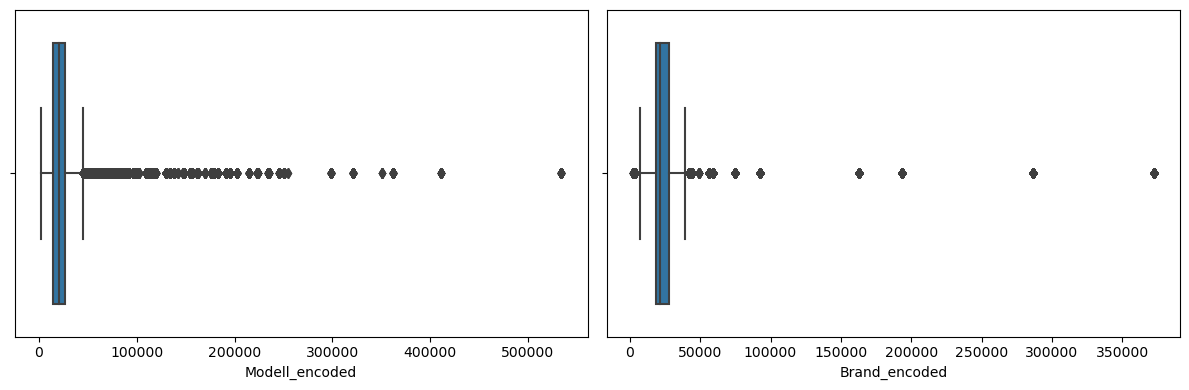

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.boxplot(x=df['Modell_encoded'],ax=axes[0])
sns.boxplot(x=df['Brand_encoded'],ax=axes[1])

plt.tight_layout()  # Optional: adjust layout for better spacing

plt.show()

## Now, I will use log transforamtion in order to reduce skewness of the data:

In [15]:
df['price_in_euro_log'] = np.log(df['price_in_euro'] + 1)
df['mileage_in_km_log'] = np.log(df['mileage_in_km'] + 1)
df['fuel_consumption_l_100km_log'] = np.log(df['fuel_consumption_l_100km'] + 1)
df['power_ps_log']=np.log(df['power_ps']+1)
df['age_log']=np.log(df['age']+1)
df['Modell_encoded_log']=np.log(df['Modell_encoded']+1)
df['Brand_encoded_log']=np.log(df['Brand_encoded']+1)

In [16]:
skew_price = skew(df['price_in_euro_log'].dropna())
skew_mileage= skew(df['mileage_in_km_log'].dropna())
skew_fuel = skew(df['fuel_consumption_l_100km_log'].dropna())
skew_age= skew(df['age_log'].dropna())
skew_ps= skew(df['power_ps_log'].dropna())
skew_Model = skew(df['Modell_encoded_log'].dropna())
skew_Brand= skew(df['Brand_encoded_log'].dropna())
print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')
print(f'Skewness - Model: {skew_Model}')
print(f'Skewness - Brand: {skew_Brand}')
kurt_price = kurtosis(df['price_in_euro_log'].dropna())
kurt_mileage = kurtosis(df['mileage_in_km_log'].dropna())
kurt_fuel = kurtosis(df['fuel_consumption_l_100km_log'].dropna())
kurt_age = kurtosis(df['age_log'].dropna())
kurt_ps = kurtosis(df['power_ps_log'].dropna())
kurt_Model= kurtosis(df['Modell_encoded_log'].dropna())
kurt_Brand = kurtosis(df['Brand_encoded_log'].dropna())
print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')
print(f'Kurtosis - Modell: {kurt_Model}')
print(f'Kurtosis - Brand: {kurt_Brand}')


Skewness - Price: -0.387153796909067
Skewness - Mileage: -2.4664216281430273
Skewness - Fuel: 0.4949507377889977
Skewness - Age: -0.2706747890998411
Skewness - PS: 0.6074643330580578
Skewness - Model: 0.6698165263603767
Skewness - Brand: 2.351825651627
Kurtosis - Price: 1.563254640910003
Kurtosis - Mileage: 6.077553892613642
Kurtosis - Fuel: 2.3838484918789895
Kurtosis - Age: -0.5270328776128701
Kurtosis - PS: 0.6593717163032071
Kurtosis - Modell: 3.2177901304059695
Kurtosis - Brand: 11.799154840582432


### I see the improvement of the skewness and kurtosis. Now, I check the number of outliers.

In [17]:
outliers_price = count_outliers(df, 'price_in_euro_log')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df, 'mileage_in_km_log')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df, 'fuel_consumption_l_100km_log')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df, 'power_ps_log')
print('The number of outliers for power is:', outliers_power)

outliers_model = count_outliers(df, 'Modell_encoded_log')
print('The number of outliers for model is:', outliers_model)

outliers_brand = count_outliers(df, 'Brand_encoded_log')
print('The number of outliers for brand is:', outliers_brand)


The number of outliers for price is: 12833
The number of outliers for mileage is: 19907
The number of outliers for fuel consum is: 11208
The number of outliers for power is: 9163
The number of outliers for model is: 10907
The number of outliers for brand is: 10242


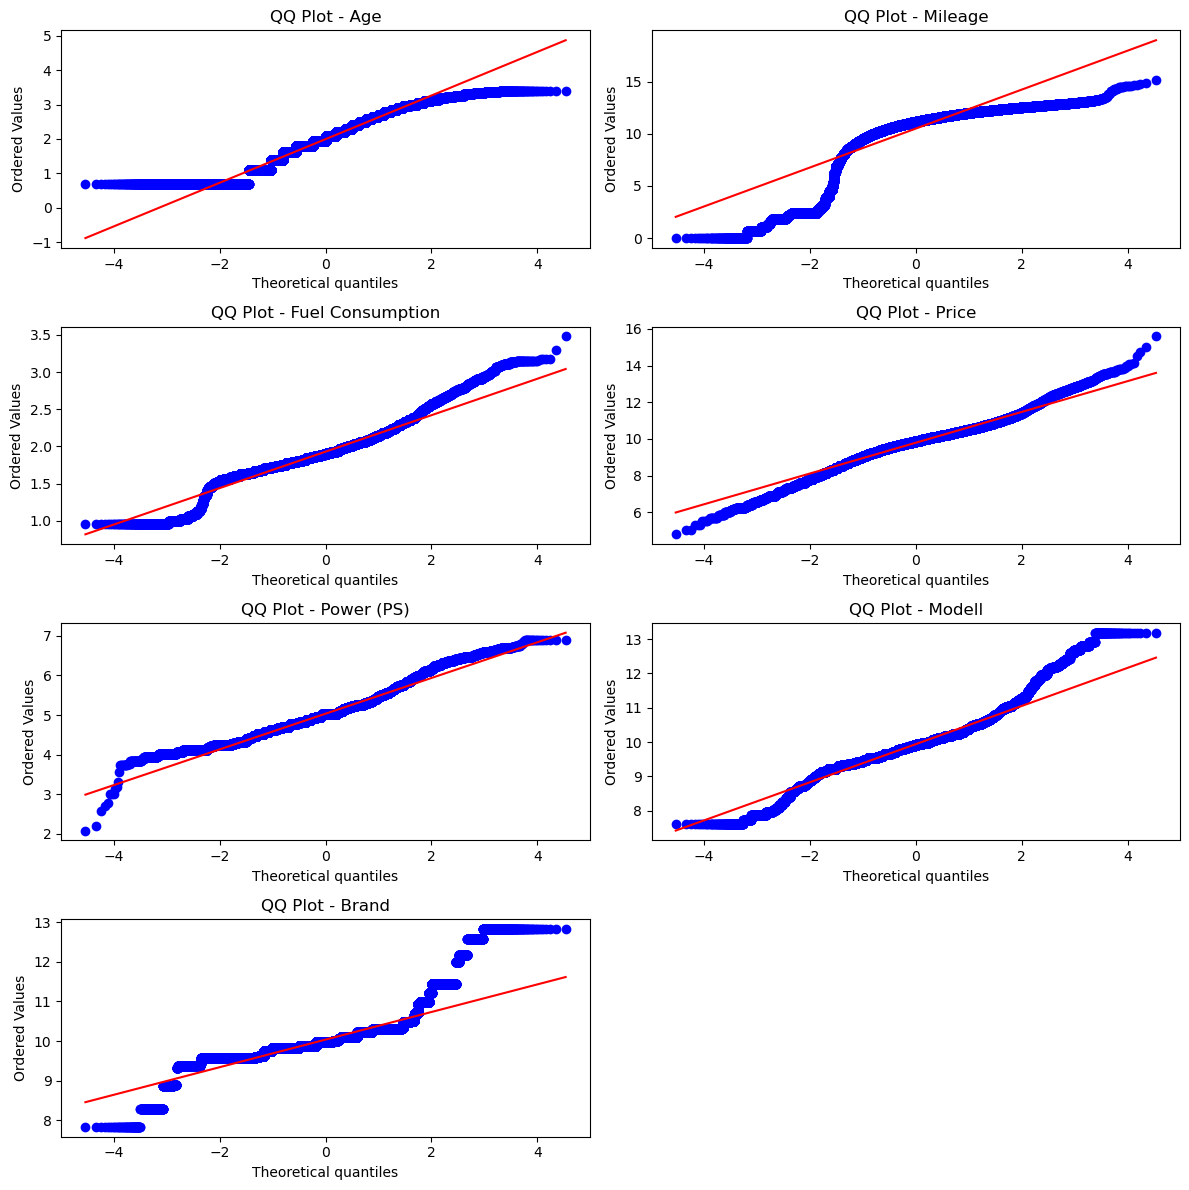

In [18]:
# Create a 3x2 grid (to accommodate 5 QQ plots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# First QQ plot (Age)
stats.probplot(df['age_log'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot - Age')

# Second QQ plot (Mileage)
stats.probplot(df['mileage_in_km_log'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot - Mileage')

# Third QQ plot (Fuel consumption)
stats.probplot(df['fuel_consumption_l_100km_log'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot - Fuel Consumption')

# Fourth QQ plot (Price)
stats.probplot(df['price_in_euro_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Price')

# Fifth QQ plot (Power in PS)
stats.probplot(df['power_ps_log'], dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('QQ Plot - Power (PS)')

# Sixth QQ plot (Model)
stats.probplot(df['Modell_encoded_log'], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('QQ Plot - Modell')

# Seventh QQ plot (Brand)
stats.probplot(df['Brand_encoded_log'], dist="norm", plot=axes[3, 0])
axes[3, 0].set_title('QQ Plot - Brand')

# Remove the unused subplot (axes[2, 1])
fig.delaxes(axes[3, 1])

# Adjust the layout to make it more readable
plt.tight_layout()



# Show the plot
plt.show()

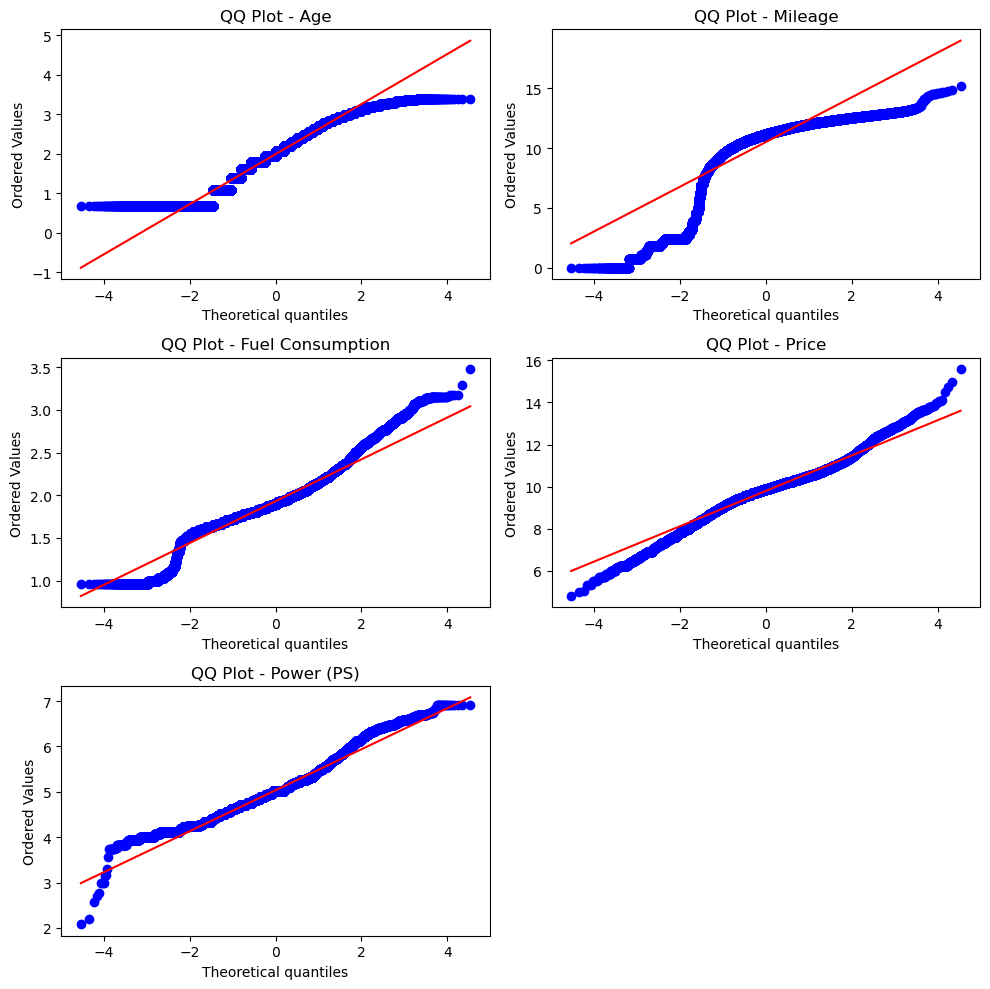

In [19]:
# Create a 3x2 grid (to accommodate 5 QQ plots)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# First QQ plot (Age)
stats.probplot(df['age_log'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot - Age')

# Second QQ plot (Mileage)
stats.probplot(df['mileage_in_km_log'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot - Mileage')

# Third QQ plot (Fuel consumption)
stats.probplot(df['fuel_consumption_l_100km_log'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot - Fuel Consumption')

# Fourth QQ plot (Price)
stats.probplot(df['price_in_euro_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Price')

# Fifth QQ plot (Power in PS)
stats.probplot(df['power_ps_log'], dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('QQ Plot - Power (PS)')

# Remove the unused subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

# Adjust the layout to make it more readable
plt.tight_layout()



# Show the plot
plt.show()

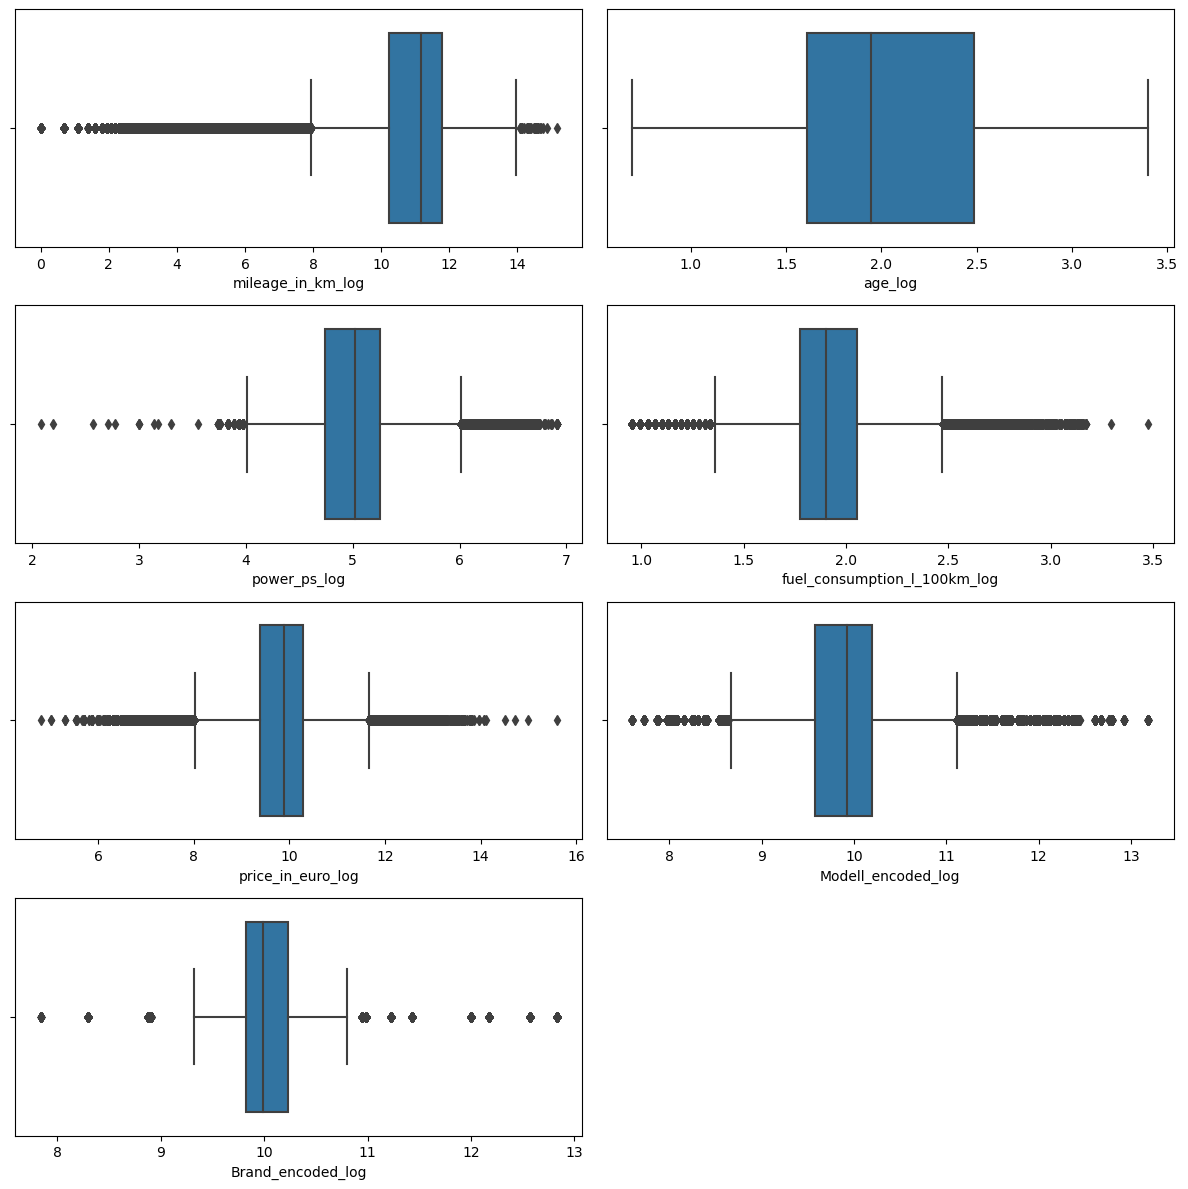

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

sns.boxplot(x=df['mileage_in_km_log'],ax=axes[0, 0])


sns.boxplot(x=df['age_log'],ax=axes[0, 1])


sns.boxplot(x=df['power_ps_log'], ax=axes[1, 0])


sns.boxplot(x=df['fuel_consumption_l_100km_log'], ax=axes[1, 1])

sns.boxplot(x=df['price_in_euro_log'], ax=axes[2, 0])

sns.boxplot(x=df['Modell_encoded_log'], ax=axes[2, 1])

sns.boxplot(x=df['Brand_encoded_log'], ax=axes[3, 0])

# Remove the empty subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show()

plt.show()

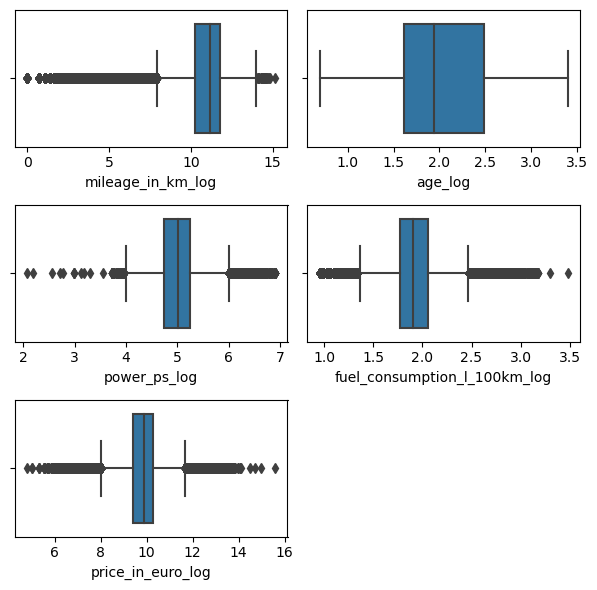

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))

sns.boxplot(x=df['mileage_in_km_log'],ax=axes[0, 0])


sns.boxplot(x=df['age_log'],ax=axes[0, 1])


sns.boxplot(x=df['power_ps_log'], ax=axes[1, 0])


sns.boxplot(x=df['fuel_consumption_l_100km_log'], ax=axes[1, 1])

sns.boxplot(x=df['price_in_euro_log'], ax=axes[2, 0])
# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show();


### Now I will apply Robust Scaling to transformed and not-transformed data:

### The Robust Scaler is sometimes preferred over other scaling methods, such as StandardScaler or MinMaxScaler, because it is more resilient to outliers and is better suited for data with skewed distributions. Here's why it might be chosen:

1. Resilience to Outliers:
RobustScaler uses the median and interquartile range (IQR), which are robust to outliers. Specifically:
It subtracts the median from each feature.
It divides by the interquartile range (the range between the 25th and 75th percentiles).
This means that extreme values (outliers) do not have as much influence on the scaling process compared to other methods, which use mean and standard deviation or min-max scaling.
StandardScaler: Scales data by subtracting the mean and dividing by the standard deviation, making it sensitive to outliers. If the data has extreme outliers, they can skew the mean and standard deviation, causing most of the data to be scaled incorrectly.
MinMaxScaler: Scales data to a range, usually [0, 1], based on the minimum and maximum values. Outliers can heavily affect the scaling because a single extreme value can stretch the range, squeezing most of the other values into a small range.

2. Better for Skewed Data:
RobustScaler is well-suited for datasets where the data distribution is skewed or contains extreme values (outliers). Since it uses the median and IQR, it effectively handles distributions that are not symmetric and avoids the problems associated with skewed data.
StandardScaler and MinMaxScaler are more appropriate when the data is approximately normal (Gaussian distribution) or when you want the data scaled to a specific range, but they can struggle with skewed data.

3. Maintaining the Central Distribution:
Since the median is used, the central distribution of data is maintained without being pulled towards extreme values. This is especially important in algorithms that rely on distance measures, such as KNN or SVMs, where you want the distance to be meaningful and not dominated by outliers.



## When to Prefer RobustScaler:
Outliers are present: If your dataset contains outliers, RobustScaler is usually preferred as it minimizes their impact on the scaling.
Skewed distribution: If the data is heavily skewed, RobustScaler helps in normalizing the features without distorting the distribution too much.
Models sensitive to scaling: Algorithms like Linear Regression, Logistic Regression, K-Means, and K-Nearest Neighbors are sensitive to scaling, and using RobustScaler can give better performance in the presence of outliers.

## When to Use Other Scaling Methods:
StandardScaler is preferred when:
The data is normally distributed or close to Gaussian (mean-centered, with a standard deviation that is not too far from 1).
You need to work with algorithms sensitive to variance, such as PCA, LDA, or SVM with a linear kernel.
MinMaxScaler is preferred when:
You need data in a specific range (e.g., between 0 and 1) for algorithms like neural networks, where the input features should have a consistent range for better convergence.
Summary:
RobustScaler is often preferred in cases with outliers or skewed data, as it reduces the impact of extreme values while maintaining the central distribution of features.
StandardScaler and MinMaxScaler are best suited for normally distributed data or when you need to bring the data to a specific range.
Each scaler has its strengths, and choosing the right one depends on the characteristics of your data and the algorithms you're using.

In [22]:
columns_to_scale = ['price_in_euro', 'mileage_in_km', 'fuel_consumption_l_100km','power_ps', 
                    'age','Modell_encoded', 'Brand_encoded',
                    'price_in_euro_log', 'mileage_in_km_log', 'fuel_consumption_l_100km_log','power_ps_log', 
                    'age_log','Modell_encoded_log', 'Brand_encoded_log' ]

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the RobustScaler to your columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

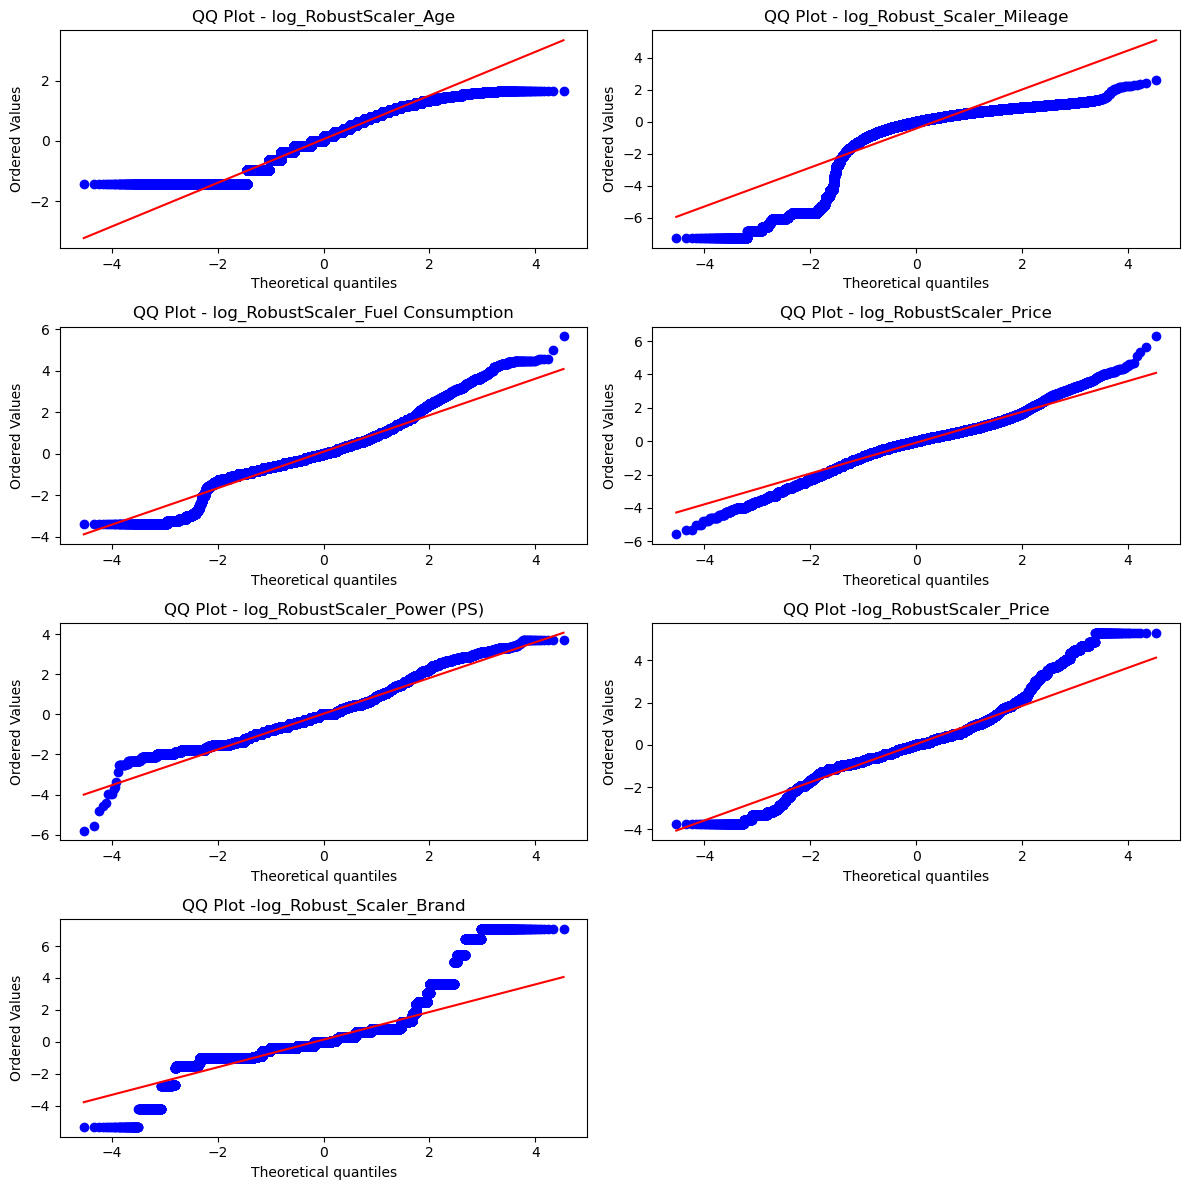

In [23]:
# Create a 4x2 grid (to accommodate 5 QQ plots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# First QQ plot (Age)
stats.probplot(df['age_log'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot - log_RobustScaler_Age')

# Second QQ plot (Mileage)
stats.probplot(df['mileage_in_km_log'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot - log_Robust_Scaler_Mileage')

# Third QQ plot (Fuel consumption)
stats.probplot(df['fuel_consumption_l_100km_log'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot - log_RobustScaler_Fuel Consumption')

# Fourth QQ plot (Price)
stats.probplot(df['price_in_euro_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - log_RobustScaler_Price')

# Fifth QQ plot (Power in PS)
stats.probplot(df['power_ps_log'], dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('QQ Plot - log_RobustScaler_Power (PS)')

# Sixth QQ plot (Model)
stats.probplot(df['Modell_encoded_log'], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('QQ Plot -log_RobustScaler_Price')

# Seventh QQ plot (Brand)
stats.probplot(df['Brand_encoded_log'], dist="norm", plot=axes[3, 0])
axes[3, 0].set_title('QQ Plot -log_Robust_Scaler_Brand')

# Remove the unused subplot (axes[3, 1])
fig.delaxes(axes[3, 1])

# Adjust the layout to make it more readable
plt.tight_layout()



# Show the plot
plt.show()

In [24]:
print('The Number of outliers in Log transformed and Robust Scaled Data')
outliers_price = count_outliers(df, 'price_in_euro_log')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df, 'mileage_in_km_log')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df, 'fuel_consumption_l_100km_log')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df, 'power_ps_log')
print('The number of outliers for power is:', outliers_power)

outliers_model = count_outliers(df, 'Modell_encoded_log')
print('The number of outliers for model is:', outliers_model)

outliers_brand = count_outliers(df, 'Brand_encoded_log')
print('The number of outliers for brand is:', outliers_brand)


The Number of outliers in Log transformed and Robust Scaled Data
The number of outliers for price is: 12833
The number of outliers for mileage is: 19907
The number of outliers for fuel consum is: 11208
The number of outliers for power is: 9163
The number of outliers for model is: 10907
The number of outliers for brand is: 10242


## Conclusion on Robust Scaling after Log Transformation:

No additional impact on outliers: Applying Robust Scaling after log transformation did not change the number of outliers. This is consistent with the fact that Robust Scaling focuses on adjusting the scale of the data based on the median and IQR, but it doesn’t significantly affect the shape of the distribution, particularly after a log transformation has already compressed extreme values.

## Log Transformation Was the Key Contributor:
Log transformation effectively reduced outliers in Price, Fuel Consumption, and Power, but increased outliers in Mileage.
This suggests that log transformation was generally beneficial for handling skewness and extreme values, particularly for variables that had a lot of high-value outliers.


## Results after applying only Robust Scaler:

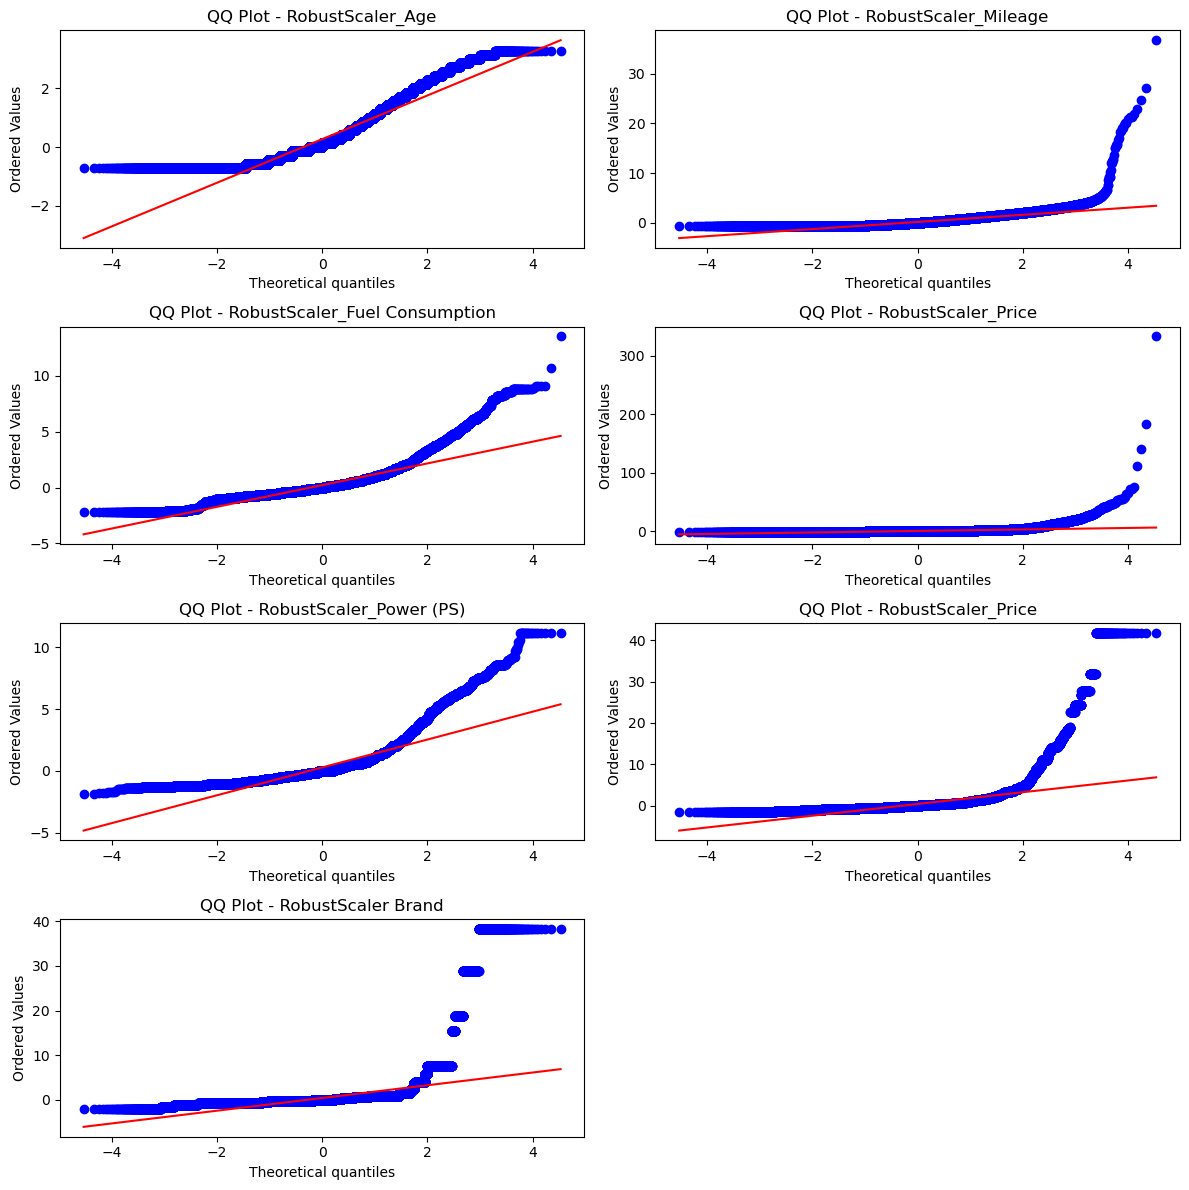

In [25]:
# Create a 3x2 grid (to accommodate 5 QQ plots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# First QQ plot (Age)
stats.probplot(df['age'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot - RobustScaler_Age')

# Second QQ plot (Mileage)
stats.probplot(df['mileage_in_km'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot - RobustScaler_Mileage')

# Third QQ plot (Fuel consumption)
stats.probplot(df['fuel_consumption_l_100km'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot - RobustScaler_Fuel Consumption')

# Fourth QQ plot (Price)
stats.probplot(df['price_in_euro'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - RobustScaler_Price')

# Fifth QQ plot (Power in PS)
stats.probplot(df['power_ps'], dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('QQ Plot - RobustScaler_Power (PS)')

# Sixth QQ plot (Model)
stats.probplot(df['Modell_encoded'], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('QQ Plot - RobustScaler_Price')

# Seventh QQ plot (Brand)
stats.probplot(df['Brand_encoded'], dist="norm", plot=axes[3, 0])
axes[3, 0].set_title('QQ Plot - RobustScaler Brand')

# Remove the unused subplot (axes[2, 1])
fig.delaxes(axes[3, 1])

# Adjust the layout to make it more readable
plt.tight_layout()



# Show the plot
plt.show()

In [26]:
print('The Outliers Numbers in Robust Scaled Data')
outliers_price = count_outliers(df, 'price_in_euro')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df, 'mileage_in_km')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df, 'fuel_consumption_l_100km')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df, 'power_ps')
print('The number of outliers for power is:', outliers_power)

outliers_model = count_outliers(df, 'Modell_encoded')
print('The number of outliers for model is:', outliers_model)

outliers_brand = count_outliers(df, 'Brand_encoded')
print('The number of outliers for brand is:', outliers_brand)


The Outliers Numbers in Robust Scaled Data
The number of outliers for price is: 14599
The number of outliers for mileage is: 4878
The number of outliers for fuel consum is: 14591
The number of outliers for power is: 20170
The number of outliers for model is: 17808
The number of outliers for brand is: 11360


### Skewness and Curtosis (Log Transformation + Robust Scaler):

In [27]:
skew_price = skew(df['price_in_euro_log'].dropna())
skew_mileage= skew(df['mileage_in_km_log'].dropna())
skew_fuel = skew(df['fuel_consumption_l_100km_log'].dropna())
skew_age= skew(df['age_log'].dropna())
skew_ps= skew(df['power_ps_log'].dropna())
skew_Model = skew(df['Modell_encoded_log'].dropna())
skew_Brand= skew(df['Brand_encoded_log'].dropna())



print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')
print(f'Skewness - Model: {skew_Model}')
print(f'Skewness - Brand: {skew_Brand}')



kurt_price = kurtosis(df['price_in_euro_log'].dropna())
kurt_mileage = kurtosis(df['mileage_in_km_log'].dropna())
kurt_fuel = kurtosis(df['fuel_consumption_l_100km_log'].dropna())
kurt_age = kurtosis(df['age_log'].dropna())
kurt_ps = kurtosis(df['power_ps_log'].dropna())
kurt_Model= kurtosis(df['Modell_encoded_log'].dropna())
kurt_Brand = kurtosis(df['Brand_encoded_log'].dropna())


print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')
print(f'Kurtosis - Modell: {kurt_Model}')
print(f'Kurtosis - Brand: {kurt_Brand}')


Skewness - Price: -0.3871537969090678
Skewness - Mileage: -2.466421628143029
Skewness - Fuel: 0.4949507377890041
Skewness - Age: -0.27067478909984355
Skewness - PS: 0.6074643330580615
Skewness - Model: 0.6698165263603699
Skewness - Brand: 2.3518256516269846
Kurtosis - Price: 1.5632546409100057
Kurtosis - Mileage: 6.077553892613647
Kurtosis - Fuel: 2.3838484918789984
Kurtosis - Age: -0.5270328776128697
Kurtosis - PS: 0.6593717163032093
Kurtosis - Modell: 3.2177901304059597
Kurtosis - Brand: 11.799154840582377


### Skewness and Curtosis (only Robust Scaler):

In [28]:
skew_price = skew(df['price_in_euro'].dropna())
skew_mileage= skew(df['mileage_in_km'].dropna())
skew_fuel = skew(df['fuel_consumption_l_100km'].dropna())
skew_age= skew(df['age'].dropna())
skew_ps= skew(df['power_ps'].dropna())
skew_Model = skew(df['Modell_encoded'].dropna())
skew_Brand= skew(df['Brand_encoded'].dropna())



print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')
print(f'Skewness - Model: {skew_Model}')
print(f'Skewness - Brand: {skew_Brand}')



kurt_price = kurtosis(df['price_in_euro'].dropna())
kurt_mileage = kurtosis(df['mileage_in_km'].dropna())
kurt_fuel = kurtosis(df['fuel_consumption_l_100km'].dropna())
kurt_age = kurtosis(df['age'].dropna())
kurt_ps = kurtosis(df['power_ps'].dropna())
kurt_Model= kurtosis(df['Modell_encoded'].dropna())
kurt_Brand = kurtosis(df['Brand_encoded'].dropna())


print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')
print(f'Kurtosis - Modell: {kurt_Model}')
print(f'Kurtosis - Brand: {kurt_Brand}')


Skewness - Price: 29.61604136374283
Skewness - Mileage: 3.1049285555279194
Skewness - Fuel: 2.0435293551265685
Skewness - Age: 1.0213812084814997
Skewness - PS: 2.387538278513379
Skewness - Model: 7.91070139161453
Skewness - Brand: 9.402883897352105
Kurtosis - Price: 3325.1657888845198
Kurtosis - Mileage: 62.970038412374336
Kurtosis - Fuel: 7.529219078802537
Kurtosis - Age: 0.637055423977892
Kurtosis - PS: 7.648055807357599
Kurtosis - Modell: 99.1425692623683
Kurtosis - Brand: 112.15483214166618


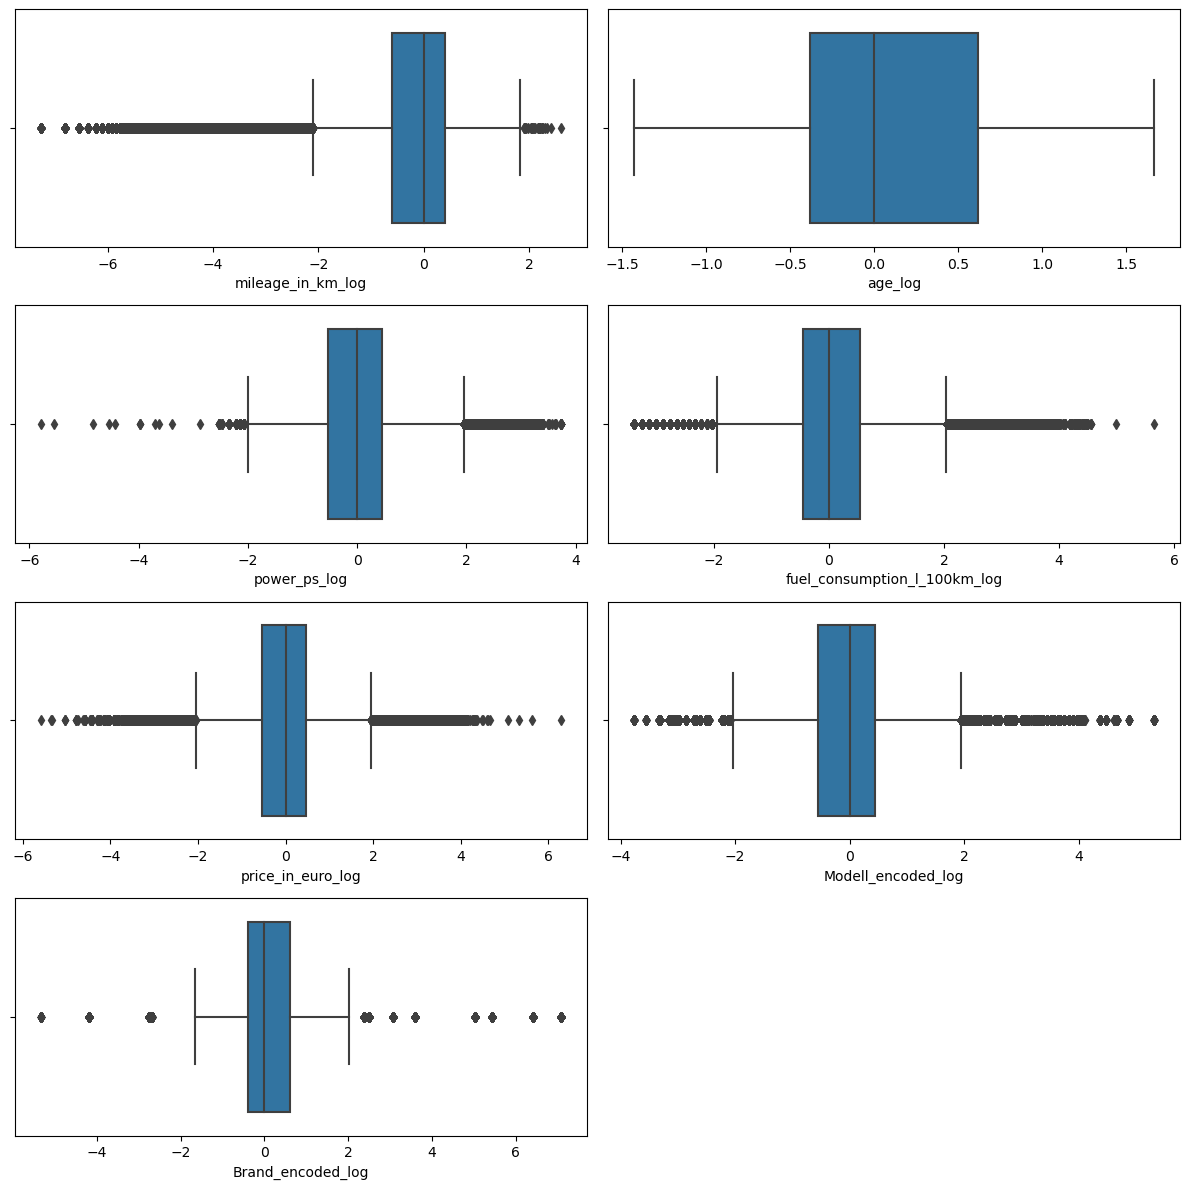

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

sns.boxplot(x=df['mileage_in_km_log'],ax=axes[0, 0])


sns.boxplot(x=df['age_log'],ax=axes[0, 1])


sns.boxplot(x=df['power_ps_log'], ax=axes[1, 0])


sns.boxplot(x=df['fuel_consumption_l_100km_log'], ax=axes[1, 1])

sns.boxplot(x=df['price_in_euro_log'], ax=axes[2, 0])

sns.boxplot(x=df['Modell_encoded_log'], ax=axes[2, 1])

sns.boxplot(x=df['Brand_encoded_log'], ax=axes[3, 0])

# Remove the empty subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show()

plt.show()

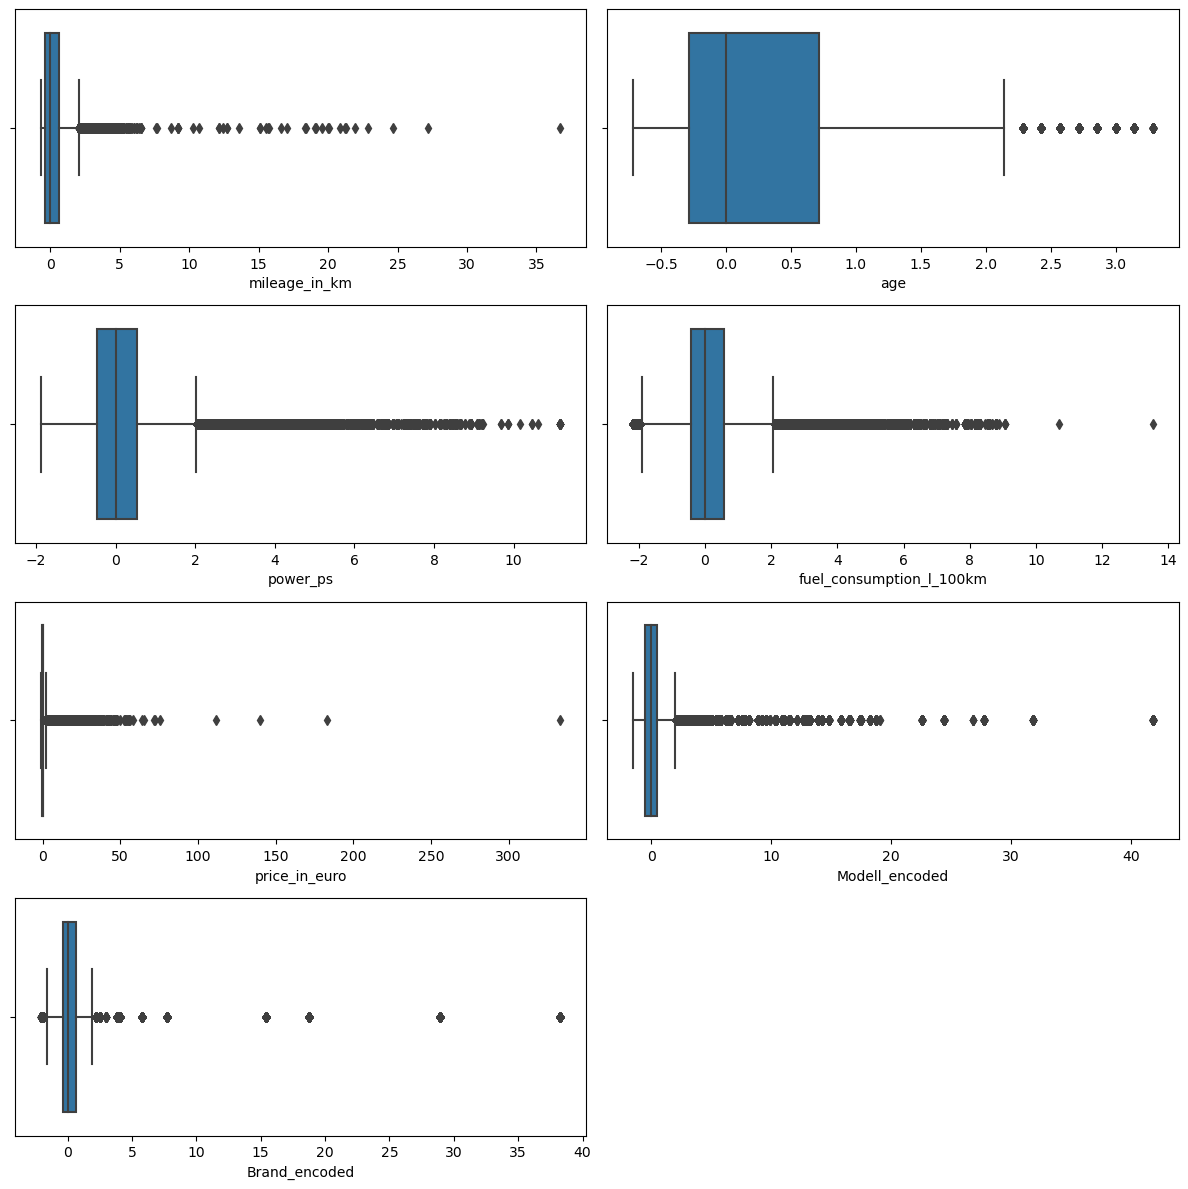

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

sns.boxplot(x=df['mileage_in_km'],ax=axes[0, 0])


sns.boxplot(x=df['age'],ax=axes[0, 1])


sns.boxplot(x=df['power_ps'], ax=axes[1, 0])


sns.boxplot(x=df['fuel_consumption_l_100km'], ax=axes[1, 1])

sns.boxplot(x=df['price_in_euro'], ax=axes[2, 0])

sns.boxplot(x=df['Modell_encoded'], ax=axes[2, 1])

sns.boxplot(x=df['Brand_encoded'], ax=axes[3, 0])

# Remove the empty subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show()

plt.show()

In [31]:
without transformations
Skewness - Price: 29.695497019507023
Skewness - Mileage: 3.0726586937994784
Skewness - Fuel: 2.0492610026770346
Skewness - Age: 1.0306348777520584
Skewness - PS: 2.4043843512545586
Kurtosis - Price: 3362.5263745101515
Kurtosis - Mileage: 61.724623586291415
Kurtosis - Fuel: 7.590015785305225
Kurtosis - Age: 0.6614707394173243
Kurtosis - PS: 7.766376754278069
The number of outliers for price is: 14628
The number of outliers for mileage is: 4980
The number of outliers for fuel consum is: 14793
The number of outliers for power is: 18871
    
log transformations
Skewness - Price: -0.4048255861296931
Skewness - Mileage: -2.3220537159533605
Skewness - Fuel: 0.4914709203168819
Skewness - Age: -0.2634577192520265
Skewness - PS: 0.6156843760685614

Kurtosis - Price: 1.6059611580123478
Kurtosis - Mileage: 4.997980990377073
Kurtosis - Fuel: 2.4180439915801584
Kurtosis - Age: -0.5772115663780677
Kurtosis - PS: 0.6835383756275033

The number of outliers for price is: 12835
The number of outliers for mileage is: 22553
The number of outliers for fuel consum is: 11456
The number of outliers for power is: 8227

robust scaler:
Skewness - Price: 29.695497019507044
Skewness - Mileage: 3.0726586937994766
Skewness - Fuel: 2.049261002677034
Skewness - Age: 1.0306348777520582
Skewness - PS: 2.4043843512545586

Kurtosis - Price: 3362.5263745101547
Kurtosis - Mileage: 61.72462358629144
Kurtosis - Fuel: 7.590015785305228
Kurtosis - Age: 0.6614707394173225
Kurtosis - PS: 7.766376754278069
    
The Outliers Numbers in Robust Scaled Data
The number of outliers for price is: 14628
The number of outliers for mileage is: 4980
The number of outliers for fuel consum is: 14793
The number of outliers for power is: 18871
    
log transforamtion and robust scaler:
Skewness - Price: -0.4048255861296979
Skewness - Mileage: -2.3220537159533605
Skewness - Fuel: 0.49147092031688294
Skewness - Age: -0.26345771925202727
Skewness - PS: 0.6156843760685556
Kurtosis - Price: 1.6059611580123514
Kurtosis - Mileage: 4.997980990377077
Kurtosis - Fuel: 2.41804399158016
Kurtosis - Age: -0.5772115663780699
Kurtosis - PS: 0.6835383756274989
The Number of outliers in Log transformed and Robust Scaled Data
The number of outliers for price is: 12835
The number of outliers for mileage is: 22553
The number of outliers for fuel consum is: 11456
The number of outliers for power is: 8227

SyntaxError: invalid syntax (3747971807.py, line 1)

In [32]:

# Create a dictionary with the reorganized data
data = {
    'Metric': ['Skewness_price', 'Kurtosis_price', 'Outliers_price',
               'Skewness_mileage', 'Kurtosis_meliage','Outliers_mileage',
               'Skewness_fuel', 'Kurtosis_fuel', 'Outliers_fuel',
               'Skewness_age', 'Kurtosis_age', 'Outliers_age',
               'Skewness_PS', 'Kurtosis_PS', 'Outliers_PS'],
    
    'Before Transformation': [29.6955, 3362.5264, 14628,
                              3.0727, 61.7246, 4980,
                              2.0493, 7.5900, 14793,
                              1.0306, 0.6615, 'N/A',
                              2.4044, 7.7664, 18871],
    
    'Log Transformation': [-0.4048, 1.6060, 12835,
                           -2.3221, 4.9980, 22553,
                           0.4915, 2.4180, 11456,
                           -0.2635, -0.5772, 'N/A',
                           0.6157, 0.6835, 8227],
    
    'Robust Scaling': [29.6955, 3362.5264, 14628,
                       3.0727, 61.7246, 4980,
                       2.0493, 7.5900, 14793,
                       1.0306, 0.6615, 'N/A',
                       2.4044, 7.7664, 18871],
    
    'Log + Robust Scaling': [-0.4048, 1.6060, 12835,
                             -2.3221, 4.9980, 22553,
                             0.4915, 2.4180, 11456,
                             -0.2635, -0.5772, 'N/A',
                             0.6157, 0.6835, 8227]
}

# Convert the dictionary to a DataFrame
metrics = pd.DataFrame(data)

# Display the DataFrame
metrics

,Metric,Before Transformation,Log Transformation,Robust Scaling,Log + Robust Scaling
0,Skewness_price,29.6955,-0.4048,29.6955,-0.4048
1,Kurtosis_price,3362.5264,1.606,3362.5264,1.606
2,Outliers_price,14628,12835,14628,12835
3,Skewness_mileage,3.0727,-2.3221,3.0727,-2.3221
4,Kurtosis_meliage,61.7246,4.998,61.7246,4.998
5,Outliers_mileage,4980,22553,4980,22553
6,Skewness_fuel,2.0493,0.4915,2.0493,0.4915
7,Kurtosis_fuel,7.59,2.418,7.59,2.418
8,Outliers_fuel,14793,11456,14793,11456
9,Skewness_age,1.0306,-0.2635,1.0306,-0.2635


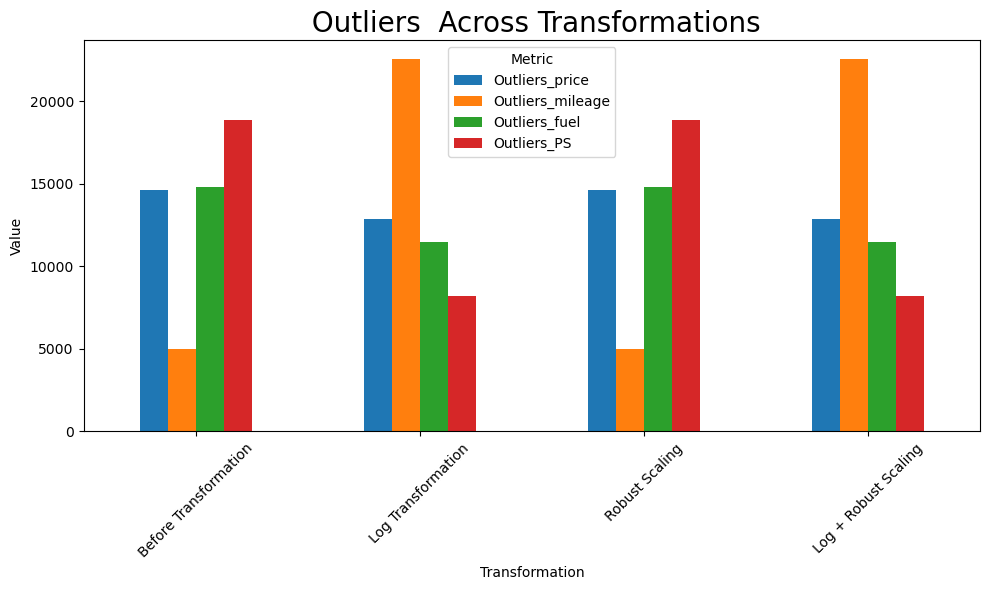

In [33]:
# Filter the rows for Skewness, Kurtosis, and Outliers for Price
outliers_metrics = metrics[metrics['Metric'].isin(['Outliers_price','Outliers_mileage', 'Outliers_PS', 'Outliers_fuel'])]

# Set the 'Metric' column as the index for better plotting
outliers_metrics.set_index('Metric', inplace=True)

# Transpose the DataFrame to make the transformations as x-axis
outliers_metrics_transposed = outliers_metrics.T

# Plot the data
outliers_metrics_transposed.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Transformation')
plt.ylabel('Value')
plt.title(' Outliers  Across Transformations', fontsize=20)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

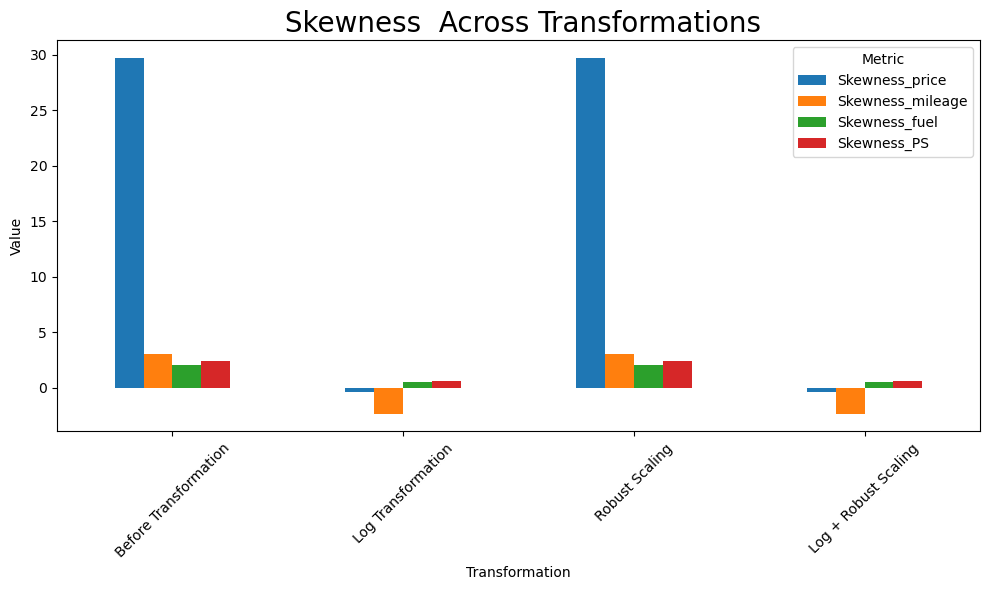

In [34]:
# Filter the rows for Skewness, Kurtosis, and Outliers for Price
skewness_metrics = metrics[metrics['Metric'].isin(['Skewness_price','Skewness_mileage', 'Skewness_PS', 'Skewness_fuel'])]

# Set the 'Metric' column as the index for better plotting
skewness_metrics.set_index('Metric', inplace=True)

# Transpose the DataFrame to make the transformations as x-axis
skewness_metrics_transposed = skewness_metrics.T

# Plot the data
skewness_metrics_transposed.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Transformation')
plt.ylabel('Value')
plt.title(' Skewness  Across Transformations', fontsize=20)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

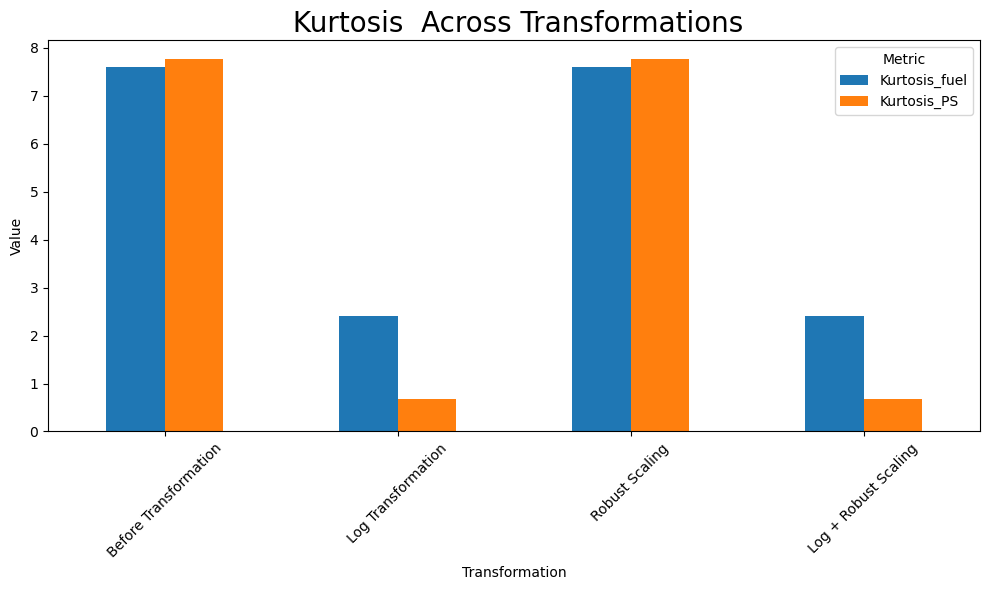

In [35]:
### Filter the rows for Skewness, Kurtosis, and Outliers for Price
kurtosis_metrics = metrics[metrics['Metric'].isin(['Kurtosis_mileage', 'Kurtosis_PS', 'Kurtosis_fuel'])]

# Set the 'Metric' column as the index for better plotting
kurtosis_metrics.set_index('Metric', inplace=True)

# Transpose the DataFrame to make the transformations as x-axis
kurtosis_metrics_transposed = kurtosis_metrics.T

# Plot the data
kurtosis_metrics_transposed.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Transformation')
plt.ylabel('Value')
plt.title(' Kurtosis  Across Transformations', fontsize=20)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

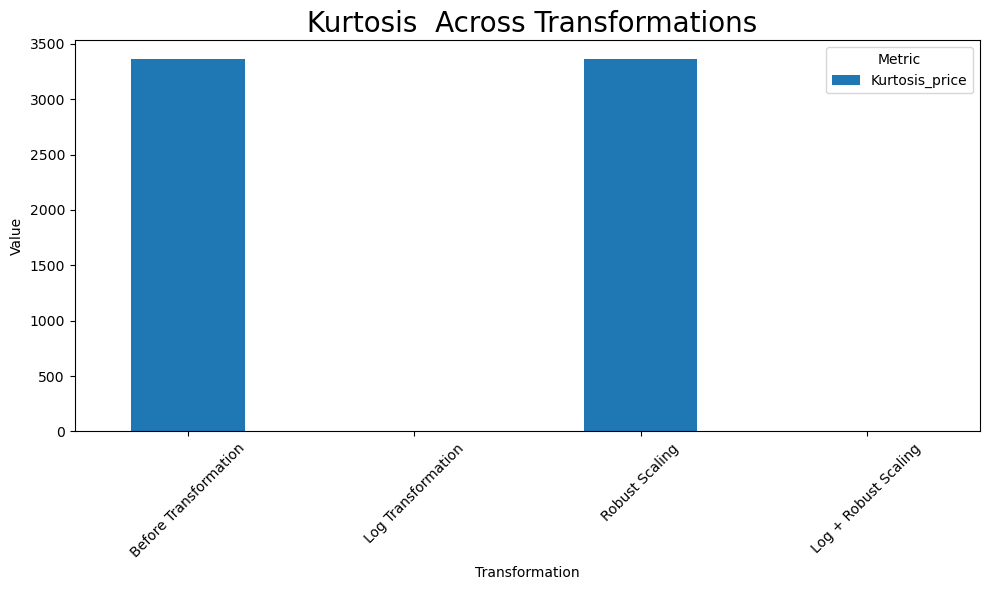

In [36]:
### Filter the rows for Skewness, Kurtosis, and Outliers for Price
kurtosis_metrics = metrics[metrics['Metric'].isin(['Kurtosis_price'])]

# Set the 'Metric' column as the index for better plotting
kurtosis_metrics.set_index('Metric', inplace=True)

# Transpose the DataFrame to make the transformations as x-axis
kurtosis_metrics_transposed = kurtosis_metrics.T

# Plot the data
kurtosis_metrics_transposed.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Transformation')
plt.ylabel('Value')
plt.title(' Kurtosis  Across Transformations', fontsize=20)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Mileage Needs Further Investigation:
The large increase in outliers for Mileage after log transformation suggests that this variable might need a different transformation (e.g., square root transformation) or further examination of its distribution. The log transformation may have compressed certain values in a way that pushed them out of the IQR, thereby increasing the number of detected outliers.

In [37]:
#cleaned dataset
df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

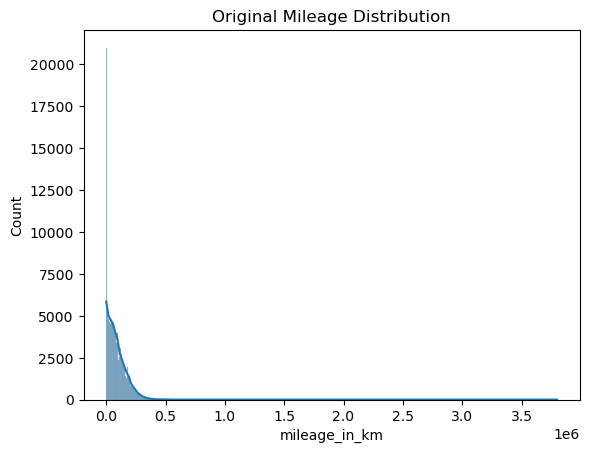

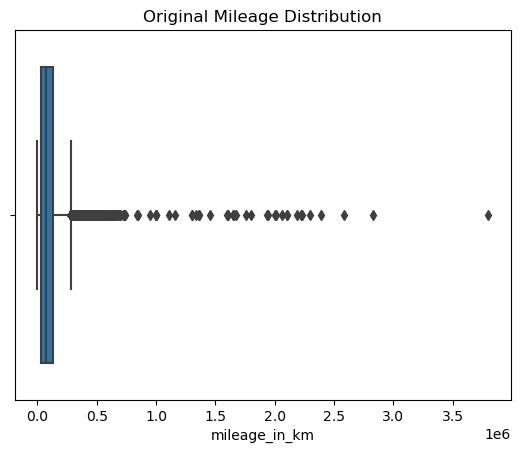

Number of outliers for Mileage: 4878


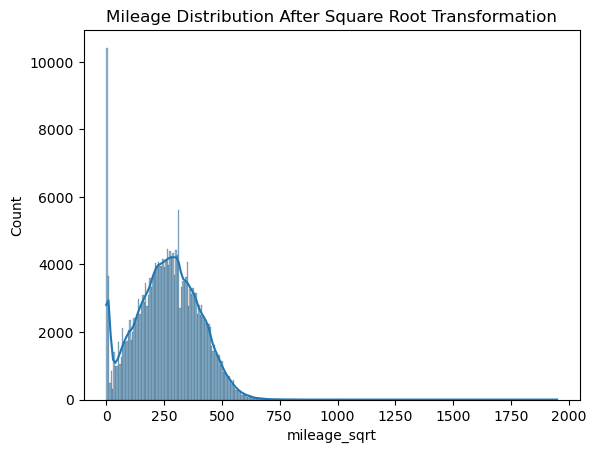

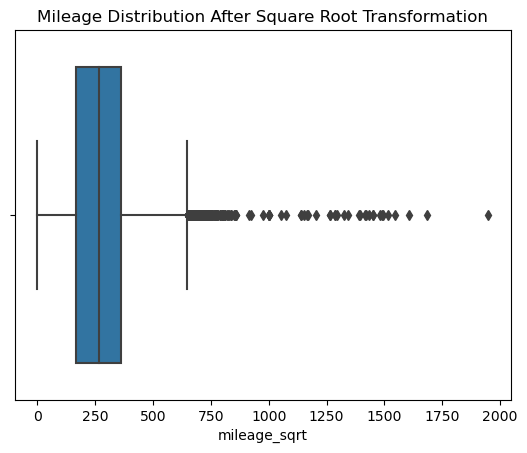

Number of outliers for Mileage after square root transformation: 360


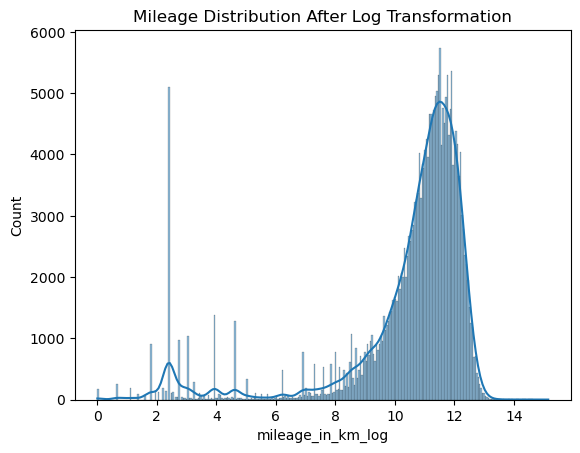

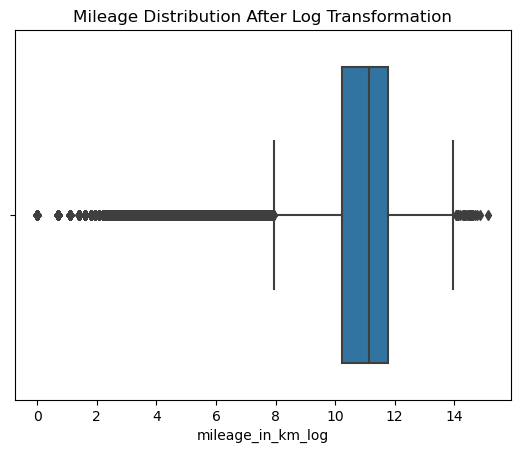

Number of outliers for Mileage after Log transformation: 19907


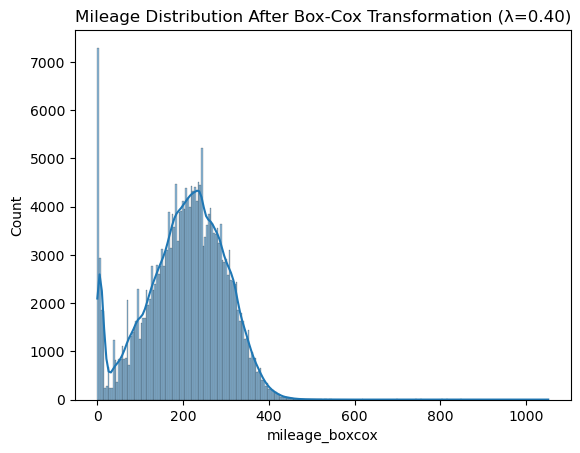

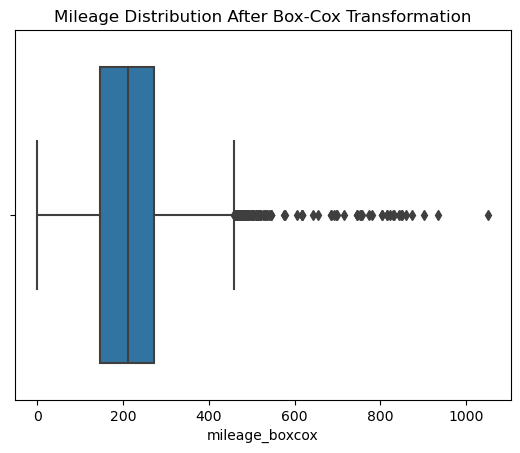

Number of outliers for Mileage after Box-Cox transformation: 154


In [38]:
# Helper function to detect outliers
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers

# Original distribution of Mileage
sns.histplot(df['mileage_in_km'], kde=True)
plt.title('Original Mileage Distribution')
plt.show()

#Boxplot
sns.boxplot(x=df['mileage_in_km'])
plt.title('Original Mileage Distribution')
plt.show()

outliers_mileage = count_outliers(df, 'mileage_in_km')

print(f'Number of outliers for Mileage: {outliers_mileage}')

# Apply Square Root Transformation
df['mileage_sqrt'] = np.sqrt(df['mileage_in_km'].clip(lower=0))  # Handle negative values safely

# Visualize the transformed distribution
sns.histplot(df['mileage_sqrt'], kde=True)
plt.title('Mileage Distribution After Square Root Transformation')
plt.show()

#Visualize boxplot
sns.boxplot(x=df['mileage_sqrt'])
plt.title('Mileage Distribution After Square Root Transformation')
plt.show()

# Check outliers after square root transformation
outliers_mileage_sqrt = count_outliers(df, 'mileage_sqrt')
print(f'Number of outliers for Mileage after square root transformation: {outliers_mileage_sqrt}')

# Apply Log Transformation )
df['mileage_in_km_log'] = np.log(df['mileage_in_km'] + 1)

# Visualize the transformed distribution
sns.histplot(df['mileage_in_km_log'], kde=True)
plt.title('Mileage Distribution After Log Transformation')
plt.show()

#Visualize boxplot
sns.boxplot(x=df['mileage_in_km_log'])
plt.title('Mileage Distribution After Log Transformation')
plt.show()

# Check outliers after log transformation
outliers_mileage_log = count_outliers(df, 'mileage_in_km_log')
print(f'Number of outliers for Mileage after Log transformation: {outliers_mileage_log}')

# Box-Cox Transformation (for positive values only)
mileage_positive = df['mileage_in_km'][df['mileage_in_km'] > 0]  # Ensure positive values only
mileage_boxcox, fitted_lambda = stats.boxcox(mileage_positive)

# Convert Box-Cox result into a DataFrame for analysis
df['mileage_boxcox'] = pd.Series(mileage_boxcox, index=mileage_positive.index)

# Visualize the Box-Cox transformed distribution
sns.histplot(df['mileage_boxcox'], kde=True)
plt.title(f'Mileage Distribution After Box-Cox Transformation (λ={fitted_lambda:.2f})')
plt.show()


#Visualize boxplot
sns.boxplot(x=df['mileage_boxcox'])
plt.title('Mileage Distribution After Box-Cox Transformation')
plt.show()

# Check outliers after Box-Cox transformation
outliers_mileage_boxcox = count_outliers(df, 'mileage_boxcox')
print(f'Number of outliers for Mileage after Box-Cox transformation: {outliers_mileage_boxcox}')

### Both transforamtions worked well: reduced skewness, curtosis and the number of outliers.

## Now, I check quickly the  dataset with dropped NaNs.

In [39]:
skew_price = skew(df_drop['price_in_euro'].dropna())
skew_mileage= skew(df_drop['mileage_in_km'].dropna())
skew_fuel = skew(df_drop['fuel_consumption_l_100km'].dropna())
skew_age= skew(df_drop['age'].dropna())
skew_ps= skew(df_drop['power_ps'].dropna())

print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')

kurt_price = kurtosis(df_drop['price_in_euro'].dropna())
kurt_mileage = kurtosis(df_drop['mileage_in_km'].dropna())
kurt_fuel = kurtosis(df_drop['fuel_consumption_l_100km'].dropna())
kurt_age = kurtosis(df_drop['age'].dropna())
kurt_ps = kurtosis(df_drop['power_ps'].dropna())

print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')

Skewness - Price: 34.412597392705834
Skewness - Mileage: 3.0798876723038173
Skewness - Fuel: 1.8562686097491932
Skewness - Age: 0.9441769118787919
Skewness - PS: 2.380561265292676
Kurtosis - Price: 4205.456959039607
Kurtosis - Mileage: 64.05975590555332
Kurtosis - Fuel: 6.400121286989645
Kurtosis - Age: 0.4487443676412459
Kurtosis - PS: 7.655047780249776


In [40]:
outliers_price = count_outliers(df_drop, 'price_in_euro')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df_drop, 'mileage_in_km')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df_drop, 'fuel_consumption_l_100km')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df_drop, 'power_ps')
print('The number of outliers for power is:', outliers_power)



The number of outliers for price is: 12737
The number of outliers for mileage is: 4097
The number of outliers for fuel consum is: 11695
The number of outliers for power is: 15501


In [41]:
df_drop['price_in_euro_log'] = np.log(df_drop['price_in_euro'] + 1)
df_drop['mileage_in_km_log'] = np.log(df_drop['mileage_in_km'] + 1)
df_drop['fuel_consumption_l_100km_log'] = np.log(df_drop['fuel_consumption_l_100km'] + 1)
df_drop['power_ps_log']=np.log(df_drop['power_ps']+1)
df_drop['age_log']=np.log(df_drop['age']+1)
#df['Modell_encoded_log']=np.log(df['Modell_encoded']+1)
#df['Brand_encoded_log']=np.log(df['Brand_encoded']+1)

In [42]:
skew_price = skew(df_drop['price_in_euro_log'].dropna())
skew_mileage= skew(df_drop['mileage_in_km_log'].dropna())
skew_fuel = skew(df_drop['fuel_consumption_l_100km_log'].dropna())
skew_age= skew(df_drop['age_log'].dropna())
skew_ps= skew(df_drop['power_ps_log'].dropna())

print(f'Skewness - Price: {skew_price}')
print(f'Skewness - Mileage: {skew_mileage}')
print(f'Skewness - Fuel: {skew_fuel}')
print(f'Skewness - Age: {skew_age}')
print(f'Skewness - PS: {skew_ps}')

kurt_price = kurtosis(df_drop['price_in_euro_log'].dropna())
kurt_mileage = kurtosis(df_drop['mileage_in_km_log'].dropna())
kurt_fuel = kurtosis(df_drop['fuel_consumption_l_100km_log'].dropna())
kurt_age = kurtosis(df_drop['age_log'].dropna())
kurt_ps = kurtosis(df_drop['power_ps_log'].dropna())

print(f'Kurtosis - Price: {kurt_price}')
print(f'Kurtosis - Mileage: {kurt_mileage}')
print(f'Kurtosis - Fuel: {kurt_fuel}')
print(f'Kurtosis - Age: {kurt_age}')
print(f'Kurtosis - PS: {kurt_ps}')

Skewness - Price: -0.39675288944313053
Skewness - Mileage: -2.4580419883241627
Skewness - Fuel: 0.470944490134834
Skewness - Age: -0.3440069442583201
Skewness - PS: 0.5976108880428883
Kurtosis - Price: 1.4706857774223012
Kurtosis - Mileage: 5.864922745055811
Kurtosis - Fuel: 2.06739856320823
Kurtosis - Age: -0.48561223626245953
Kurtosis - PS: 0.6440749492559927


In [43]:
outliers_price = count_outliers(df_drop, 'price_in_euro_log')
print('The number of outliers for price is:', outliers_price)

outliers_mileage = count_outliers(df_drop, 'mileage_in_km_log')
print('The number of outliers for mileage is:', outliers_mileage)

outliers_fuel = count_outliers(df_drop, 'fuel_consumption_l_100km_log')
print('The number of outliers for fuel consum is:', outliers_fuel)

outliers_power = count_outliers(df_drop, 'power_ps_log')
print('The number of outliers for power is:', outliers_power)



The number of outliers for price is: 9949
The number of outliers for mileage is: 19297
The number of outliers for fuel consum is: 8578
The number of outliers for power is: 6676


In [44]:
# Apply Square Root Transformation (only for non-negative values)
df_drop['mileage_sqrt'] = np.sqrt(df['mileage_in_km'].clip(lower=0))  # Handle negative values safely

In [45]:
skew_mileage_sqrt= skew(df_drop['mileage_sqrt'].dropna())
print(f'Skewness - Mileage-sqrt: {skew_mileage_sqrt}')
kurt_mileage_sqrt = kurtosis(df_drop['mileage_sqrt'].dropna())
print(f'Kurtosis - Mileage: {kurt_mileage_sqrt}')

outliers_mileage_sqrt = count_outliers(df_drop, 'mileage_sqrt')
print('The number of outliers for Mileage (Square Root Transformed):', outliers_mileage_sqrt)


Skewness - Mileage-sqrt: 0.07439592923130865
Kurtosis - Mileage: 0.11903989467299159
The number of outliers for Mileage (Square Root Transformed): 303
